<a href="https://colab.research.google.com/github/Eieiz007/Deep-learning/blob/main/ANN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API kaggle

In [ ]:
from google.colab import files
files.upload()  # choose kaggle.json your computer.

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nantakornnacamanurak","key":"4e95229071280712dd9bf7ff5ddf9beb"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d prishasawhney/mushroom-dataset

Dataset URL: https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset
License(s): other
  0% 0.00/602k [00:00<?, ?B/s]
100% 602k/602k [00:00<00:00, 94.8MB/s]


In [ ]:
!unzip mushroom-dataset.zip

Archive:  mushroom-dataset.zip
  inflating: mushroom_cleaned.csv    


In [ ]:
!ls

kaggle.json  mushroom_cleaned.csv  mushroom-dataset.zip  sample_data


#Import

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix


In [ ]:
df = pd.read_csv("mushroom_cleaned.csv")
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


# Preparetation

In [ ]:
df = pd.get_dummies(df, columns=['cap-shape', 'gill-attachment', 'gill-color' , 'stem-color'], dtype=int)
df

,cap-diameter,stem-height,stem-width,season,class,cap-shape_0,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,...,stem-color_3,stem-color_4,stem-color_5,stem-color_6,stem-color_7,stem-color_8,stem-color_9,stem-color_10,stem-color_11,stem-color_12
0,1372,3.807467,1545,1.804273,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1461,3.807467,1557,1.804273,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1371,3.612496,1566,1.804273,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1261,3.787572,1566,1.804273,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1305,3.711971,1464,0.943195,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54030,73,0.887740,569,0.943195,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
54031,82,1.186164,490,0.943195,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
54032,82,0.915593,584,0.888450,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
54033,79,1.034963,491,0.888450,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
columns = [col for col in df.columns if col != 'class'] + ['class']
df = df[columns]
df

,cap-diameter,stem-height,stem-width,season,cap-shape_0,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,...,stem-color_4,stem-color_5,stem-color_6,stem-color_7,stem-color_8,stem-color_9,stem-color_10,stem-color_11,stem-color_12,class
0,1372,3.807467,1545,1.804273,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1461,3.807467,1557,1.804273,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,1371,3.612496,1566,1.804273,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1261,3.787572,1566,1.804273,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,1305,3.711971,1464,0.943195,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54030,73,0.887740,569,0.943195,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
54031,82,1.186164,490,0.943195,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
54032,82,0.915593,584,0.888450,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
54033,79,1.034963,491,0.888450,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
# แบ่งข้อมูลแต่ละคลาส
df_class_0 = df[df['class'] == 0]
df_class_1 = df[df['class'] == 1]

# สุ่มข้อมูล 30% จากแต่ละคลาส
df_class_0_sample = df_class_0.sample(frac=0.25, random_state=42)
df_class_1_sample = df_class_1.sample(frac=0.25, random_state=42)

# รวมข้อมูลที่สุ่มมาใหม่
df_sampled = pd.concat([df_class_0_sample, df_class_1_sample]).sample(frac=1, random_state=42)  # shuffle ข้อมูล

df_sampled

,cap-diameter,stem-height,stem-width,season,cap-shape_0,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,...,stem-color_4,stem-color_5,stem-color_6,stem-color_7,stem-color_8,stem-color_9,stem-color_10,stem-color_11,stem-color_12,class
12050,24,0.557484,51,0.888450,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4221,798,0.048174,1801,1.804273,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12021,14,0.784287,53,0.943195,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
46298,738,1.901531,2551,0.888450,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10677,40,0.274976,50,0.888450,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7519,572,0.258209,1049,1.804273,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
35502,982,1.694624,1503,0.943195,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
53504,576,0.067217,1957,0.027372,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
46665,619,0.596423,1422,0.943195,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


array([[<Axes: title={'center': 'cap-diameter'}>,
        <Axes: title={'center': 'stem-height'}>,
        <Axes: title={'center': 'stem-width'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'cap-shape_0'}>,
        <Axes: title={'center': 'cap-shape_1'}>,
        <Axes: title={'center': 'cap-shape_2'}>],
       [<Axes: title={'center': 'cap-shape_3'}>,
        <Axes: title={'center': 'cap-shape_4'}>,
        <Axes: title={'center': 'cap-shape_5'}>,
        <Axes: title={'center': 'cap-shape_6'}>,
        <Axes: title={'center': 'gill-attachment_0'}>,
        <Axes: title={'center': 'gill-attachment_1'}>,
        <Axes: title={'center': 'gill-attachment_2'}>],
       [<Axes: title={'center': 'gill-attachment_3'}>,
        <Axes: title={'center': 'gill-attachment_4'}>,
        <Axes: title={'center': 'gill-attachment_5'}>,
        <Axes: title={'center': 'gill-attachment_6'}>,
        <Axes: title={'center': 'gill-color_0'}>,
        <Axes: title={'center

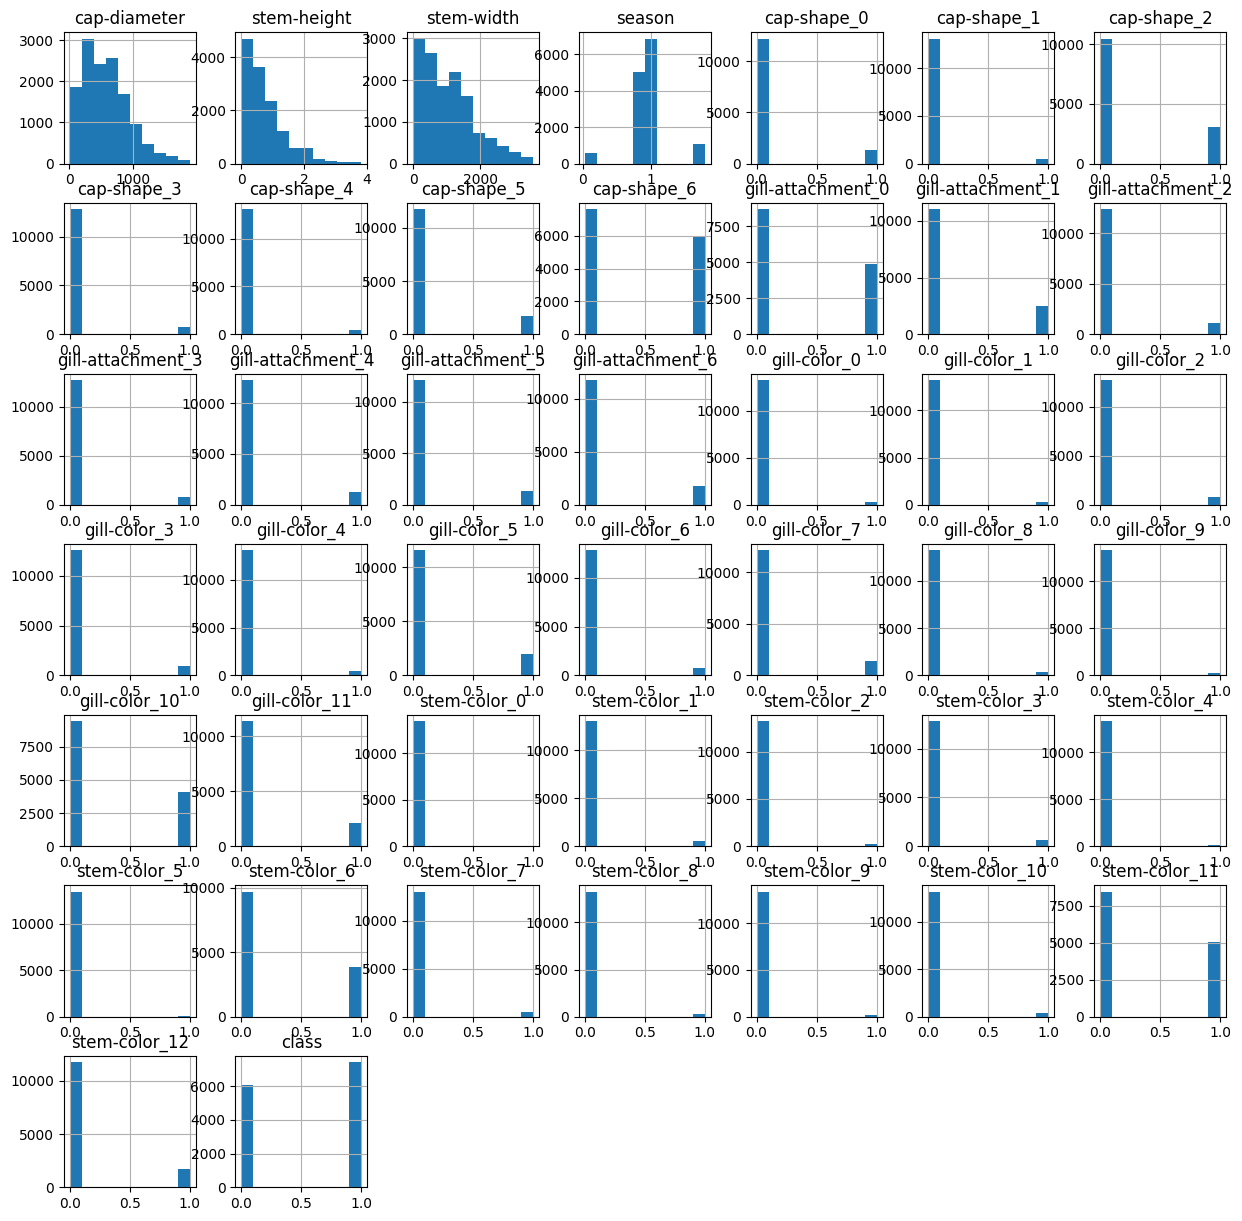

In [ ]:
df_sampled.hist(figsize=(15,15))

# Data spilting

In [ ]:
X = df_sampled.drop(columns='class')
y = df_sampled[['class']]

In [ ]:
# แบ่งข้อมูล Train (70%) และที่เหลือ (30%) โดยให้ class สมดุล
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# จากข้อมูลที่เหลือ (30%) แบ่งเป็น Validation และ Test (50:50 ของ 30%) โดยให้ class สมดุล
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# แสดงผลลัพธ์
print(f"Train set: X={X_train.shape[0]}, y={y_train.shape[0]}, Class 0={sum(y_train['class'] == 0)}, Class 1={sum(y_train['class'] == 1)}")
print(f"Validation set: X={X_val.shape[0]}, y={y_val.shape[0]}, Class 0={sum(y_val['class'] == 0)}, Class 1={sum(y_val['class'] == 1)}")
print(f"Test set: X={X_test.shape[0]}, y={y_test.shape[0]}, Class 0={sum(y_test['class'] == 0)}, Class 1={sum(y_test['class'] == 1)}")

Train set: X=9456, y=9456, Class 0=4263, Class 1=5193
Validation set: X=2026, y=2026, Class 0=913, Class 1=1113
Test set: X=2027, y=2027, Class 0=914, Class 1=1113


In [ ]:
# เลือกเฉพาะคอลัมน์ที่ต้องการใช้ StandardScaler
columns_to_scale = ['cap-diameter', 'stem-width']

# สร้าง StandardScaler
scaler = Normalizer()

# Fit-transform เฉพาะคอลัมน์ที่เลือกในชุด Train
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# Transform ชุด Validation และ Test เฉพาะคอลัมน์ที่เลือก
X_val[columns_to_scale] = scaler.transform(X_val[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [ ]:
X_train.head()

,cap-diameter,stem-height,stem-width,season,cap-shape_0,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,...,stem-color_3,stem-color_4,stem-color_5,stem-color_6,stem-color_7,stem-color_8,stem-color_9,stem-color_10,stem-color_11,stem-color_12
22191,0.405778,0.843971,0.913972,0.943195,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29720,0.604458,0.505757,0.796637,0.888450,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
30273,0.555859,0.282934,0.831277,0.943195,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
50026,0.408561,1.775055,0.912731,0.943195,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
27685,0.642706,0.166692,0.766113,0.888450,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


array([[<Axes: title={'center': 'cap-diameter'}>,
        <Axes: title={'center': 'stem-width'}>]], dtype=object)

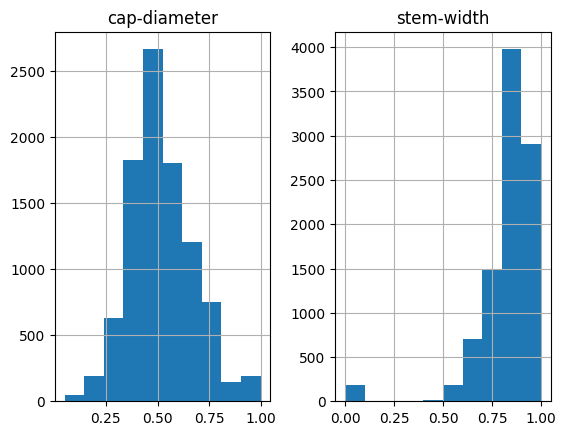

In [ ]:
X_train[['cap-diameter' , 'stem-width']].hist()

# Train model

In [ ]:
pip install lazypredict

In [ ]:
# 4. สร้างโมเดล ANN สำหรับ Regression
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu6', input_shape=(X_train.shape[1],)),  # Hidden Layer 1
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu6'),                                  # Hidden Layer 2                                 # Hidden Layer 2
    tf.keras.layers.Dense(2,activation='softmax')
])

# ใช้ Learning Rate ที่กำหนดเอง (เช่น 0.001)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 6. ฝึกโมเดล
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=300,           # จำนวน Epochs
    batch_size=64,        # Batch Size
    verbose=1,
)

Epoch 1/300
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6687 - loss: 0.6169 - val_accuracy: 0.8060 - val_loss: 0.5224
Epoch 2/300
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8828 - loss: 0.3030 - val_accuracy: 0.8756 - val_loss: 0.3471
Epoch 3/300
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9167 - loss: 0.2171 - val_accuracy: 0.8934 - val_loss: 0.2446
Epoch 4/300
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9119 - loss: 0.1959 - val_accuracy: 0.9151 - val_loss: 0.1975
Epoch 5/300
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9227 - loss: 0.1766 - val_accuracy: 0.9181 - val_loss: 0.1649
Epoch 6/300
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9318 - loss: 0.1566 - val_accuracy: 0.9329 - val_loss: 0.1507
Epoch 7/300
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9376 - loss: 0.1458 - val_accuracy: 0.9255 - val_loss: 0.1551
Epoch 8/300
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9354 - loss: 0.1483 - val_accu

test

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9433 - loss: 0.1402


In [ ]:
# แสดงค่าของ Accuracy ในแต่ละ Epoch
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# แสดงผลลัพธ์
print("Training Accuracy:", train_accuracy[-1])
print("Validation Accuracy:", val_accuracy[-1])

Training Accuracy: 0.9682741165161133
Validation Accuracy: 0.9565646648406982


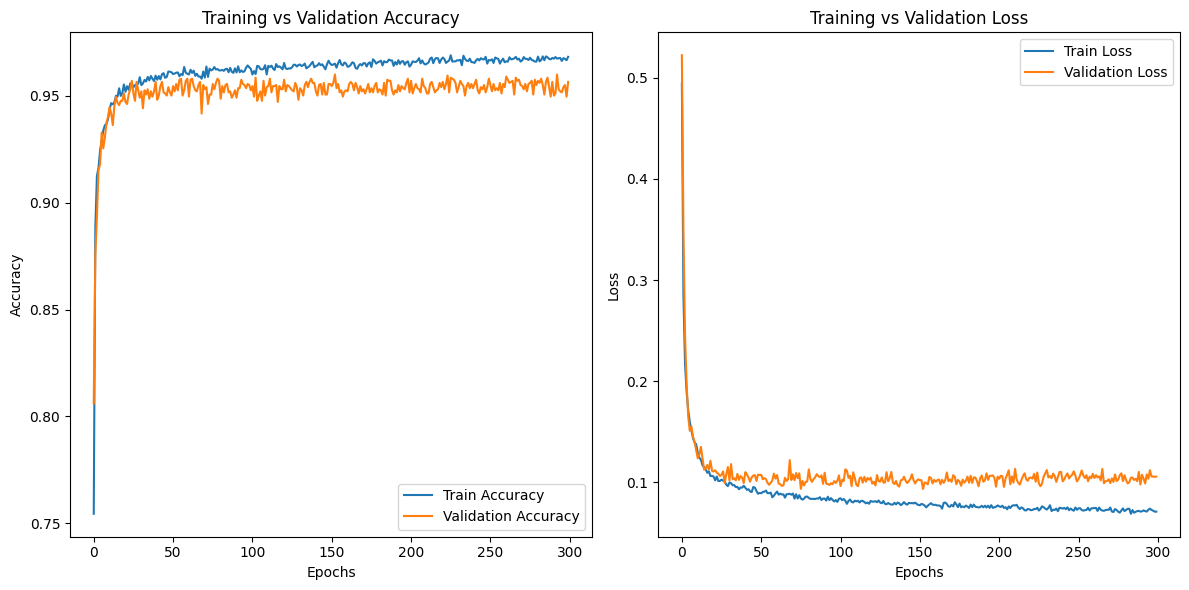

In [ ]:
# แสดงกราฟ Training และ Validation Accuracy
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# แสดงกราฟ
plt.tight_layout()
plt.show()

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


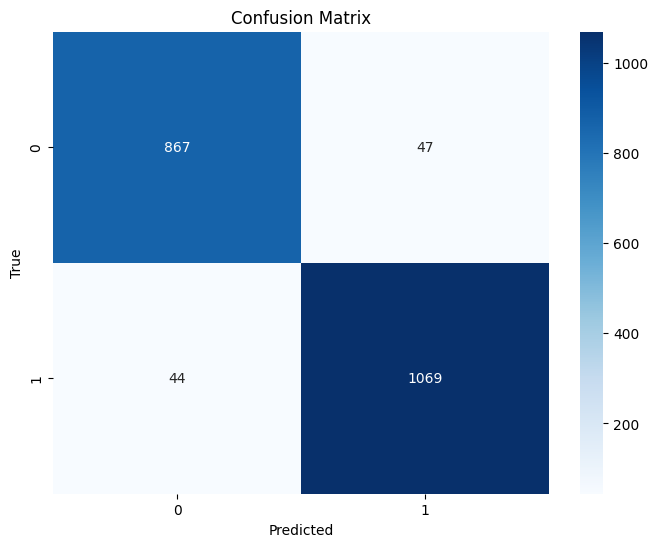

In [ ]:
# ทำนายผลบนชุด Test
y_pred = model.predict(X_test)

# เปลี่ยนค่าทำนายเป็น class ที่มีความน่าจะเป็นสูงสุด
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

# สร้าง Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

# แสดง Confusion Matrix ด้วย Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()